In [10]:
import gym
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt

Initialize FrozenLake environment from gym

In [11]:
env = gym.make('FrozenLake-v0')

/Users/b1017579/.local/share/virtualenvs/12._Reinforcement_Learning-DLBnGMow/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


Implement a Q learning algorithm

In [12]:
# Initialize table with all zeros.
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Set learning parameters
lr = 0.8
y = 0.9
num_episodes = 2000

# Create list to contain total rewards and steps per episode
rList = []

for i in range(num_episodes):
    #Reset environment and get first new observation
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    #The Q-Table learning algorithm
    while j < 99:
        j+=1
        # Choose an action greedily (with noise) picking from Q table.
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        #Get new state and reward from environment
        s1,r,d,_ = env.step(a)
        #Update Q-Table with new knowledge
        Q[s,a] = Q[s,a] + lr*(r + y*np.max(Q[s1,:]) - Q[s,a])
        rAll += r
        s = s1
        if d == True:
            break
    #jList.append(j)
    rList.append(rAll)


In [13]:
print("Score over time: " +  str(sum(rList)/num_episodes))

Score over time: 0.379


In [14]:
print("Final Q-Table Values")
print(Q)

Final Q-Table Values
[[5.07489132e-02 2.58802713e-03 1.97636477e-03 2.60746653e-03]
 [5.08891780e-05 4.18590635e-05 9.63081214e-04 3.89433597e-02]
 [4.73367191e-04 3.76511578e-02 6.49770600e-04 1.39819861e-03]
 [2.62039018e-04 3.29761947e-04 1.28315483e-06 1.21092941e-03]
 [7.74221487e-02 9.11914858e-04 3.35561670e-04 1.99182411e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.71015781e-03 3.13358976e-09 7.41008342e-06 5.23850254e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.24996384e-04 2.16406051e-04 1.34226266e-03 7.77038136e-02]
 [0.00000000e+00 1.32266362e-01 4.92816016e-04 2.67087856e-03]
 [4.59145370e-02 7.22306198e-04 2.50390141e-04 2.85524115e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.56025637e-04 6.39014840e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 9.69635057e-01]
 [0.00000000e+00 0.00000000e+00 0.

# Q - Learning with Neural Networks

In [15]:
tf.reset_default_graph()
inputs1 = tf.placeholder(shape=[1,16],dtype=tf.float32)
W = tf.Variable(tf.random_uniform([16,4],0,0.01))
Qout = tf.matmul(inputs1,W)
predict = tf.argmax(Qout,1)

#Below we obtain the loss by taking the sum of squares difference between the target and prediction Q values.
nextQ = tf.placeholder(shape=[1,4],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)


## Training the Network

In [18]:

init = tf.initialize_all_variables()

# Set learning parameters
y = .99
e = 0.1
num_episodes = 2000
#create lists to contain total rewards and steps per episode
jList = []
rList = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        #Reset environment and get first new observation
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        #The Q-Network
        while j < 99:
            j+=1
            #Choose an action by greedily (with e chance of random action) from the Q-network
            a,allQ = sess.run([predict,Qout],feed_dict={inputs1:np.identity(16)[s:s+1]})
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
            #Get new state and reward from environment
            s1,r,d,_ = env.step(a[0])
            #Obtain the Q' values by feeding the new state through our network
            Q1 = sess.run(Qout,feed_dict={inputs1:np.identity(16)[s1:s1+1]})
            #Obtain maxQ' and set our target value for chosen action.
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0,a[0]] = r + y*maxQ1
            #Train our network using target and predicted Q values
            _,W1 = sess.run([updateModel,W],feed_dict={inputs1:np.identity(16)[s:s+1],nextQ:targetQ})
            rAll += r
            s = s1
            if d == True:
                #Reduce chance of random action as we train the model.
                e = 1./((i/50) + 10)
                break
        jList.append(j)
        rList.append(rAll)
print("Percent of succesful episodes: " + str(sum(rList)/num_episodes) + "%")

Percent of succesful episodes: 0.5115%


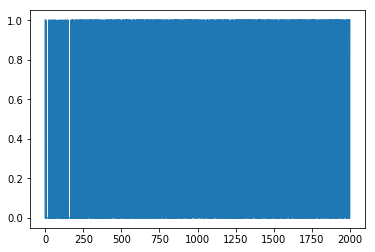

In [19]:
plt.plot(rList)


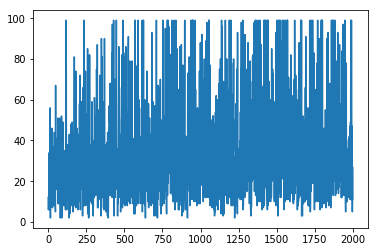

In [20]:
plt.plot(jList)
